# Intel Stock Analysis (1980-2024)

This dataset contains daily stock trading data for Intel Corporation (ticker: INTC) from 1980 to 2024, sourced from Yahoo Finance. It provides a comprehensive view of Intel's stock performance over four decades, including key metrics like opening/closing prices, trading volume, dividends, and stock splits.

In [9]:
# Data manipulation and numerical computations
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis and modeling
import statsmodels.api as sm

# Financial data
import yfinance as yf

# Miscellaneous
import datetime
import os
import logging

In [10]:
df = pd.read_csv('data.csv', parse_dates=['Date'],index_col='Date')

In [14]:
df.shape

(11289, 7)

In [15]:
df.describe

<bound method NDFrame.describe of                                 Open       High        Low      Close  \
Date                                                                    
1980-03-17 00:00:00-05:00   0.181500   0.184404   0.181500   0.181500   
1980-03-18 00:00:00-05:00   0.181500   0.182952   0.180048   0.180048   
1980-03-19 00:00:00-05:00   0.184404   0.187308   0.184404   0.184404   
1980-03-20 00:00:00-05:00   0.184403   0.186581   0.183678   0.183678   
1980-03-21 00:00:00-05:00   0.180048   0.180048   0.177143   0.177143   
...                              ...        ...        ...        ...   
2024-12-18 00:00:00-05:00  20.480000  20.580000  19.209999  19.299999   
2024-12-19 00:00:00-05:00  19.530001  19.690001  19.030001  19.059999   
2024-12-20 00:00:00-05:00  18.969999  19.760000  18.900000  19.520000   
2024-12-23 00:00:00-05:00  19.580000  20.230000  19.520000  20.200001   
2024-12-24 00:00:00-05:00  20.219999  20.400000  19.959999  20.400000   

                

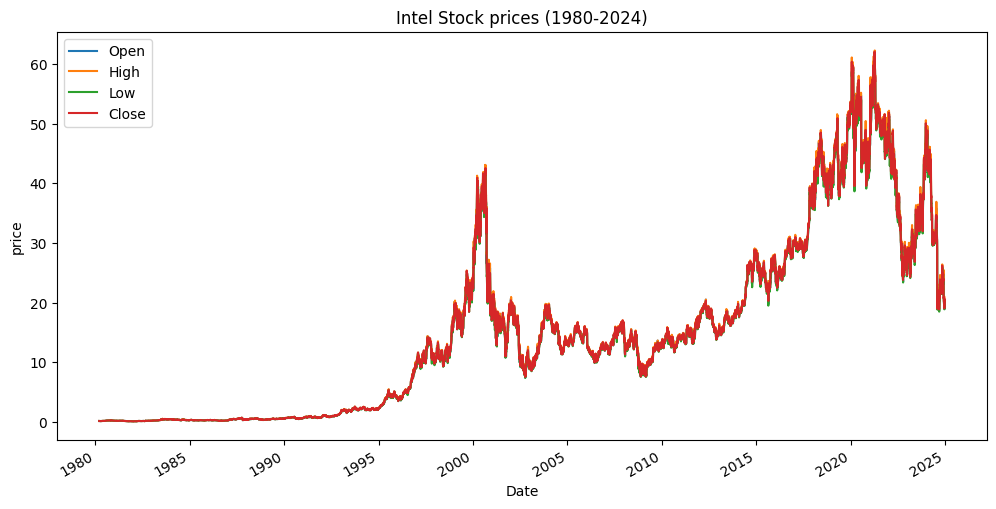

In [17]:
# Ploting the stock prices over time 
df [['Open', 'High', 'Low', 'Close']].plot(figsize=(12, 6))
plt.title('Intel Stock prices (1980-2024)')
plt.ylabel('price')
plt.show()


In [18]:
# descriptive section 
print(df[['Open', 'Close', 'High', 'Low', 'Volume']].describe())

               Open         Close          High           Low        Volume
count  11289.000000  11289.000000  11289.000000  11289.000000  1.128900e+04
mean      14.986168     14.985933     15.185892     14.787731  5.064025e+07
std       14.708247     14.709644     14.892642     14.526521  3.475946e+07
min        0.121968      0.120516      0.121968      0.120516  0.000000e+00
25%        0.810214      0.814571      0.827638      0.797147  2.744880e+07
50%       12.757638     12.742243     12.917269     12.590077  4.456490e+07
75%       22.624974     22.617407     22.879999     22.350709  6.459720e+07
max       62.028760     62.083344     62.292520     60.600833  5.677088e+08


                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999836  0.999843  0.999668 -0.214690   0.079875   
High          0.999836  1.000000  0.999760  0.999825 -0.212102   0.079184   
Low           0.999843  0.999760  1.000000  0.999841 -0.217666   0.079972   
Close         0.999668  0.999825  0.999841  1.000000 -0.215027   0.079810   
Volume       -0.214690 -0.212102 -0.217666 -0.215027  1.000000  -0.025259   
Dividends     0.079875  0.079184  0.079972  0.079810 -0.025259   1.000000   
Stock Splits -0.010084 -0.009841 -0.010122 -0.009831  0.025666  -0.002141   

              Stock Splits  
Open             -0.010084  
High             -0.009841  
Low              -0.010122  
Close            -0.009831  
Volume            0.025666  
Dividends        -0.002141  
Stock Splits      1.000000  


<Axes: >

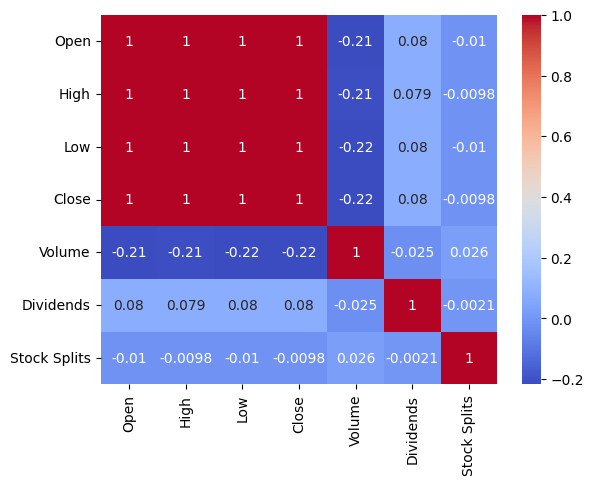

In [23]:
# correlation
print(df.corr())
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [24]:
# Forcasting closing prices 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = df.index.factorize()[0].reshape(-1, 1)  # Example feature: Time as numeric
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [26]:
# Anomaly detection 
from scipy.stats import zscore
df['Price_Zscore'] = zscore(df['Close'])
anomalies = df[df['Price_Zscore'].abs() > 3]
print(anomalies)


                                Open       High        Low      Close  \
Date                                                                    
2020-01-24 00:00:00-05:00  58.720856  61.120147  58.623825  60.396832   
2020-01-28 00:00:00-05:00  58.659108  59.611769  58.165138  59.373600   
2020-02-05 00:00:00-05:00  58.826701  59.629401  58.332725  59.400055   
2020-02-06 00:00:00-05:00  59.657135  59.745777  59.187319  59.470978   
2020-02-11 00:00:00-05:00  59.240508  60.020569  59.010033  59.754642   
2020-02-12 00:00:00-05:00  59.923070  60.357421  59.666003  59.798969   
2020-02-13 00:00:00-05:00  59.382331  59.967382  59.160722  59.781231   
2020-02-14 00:00:00-05:00  59.852148  60.153540  59.231645  59.630539   
2020-02-19 00:00:00-05:00  58.850477  59.568488  58.664327  59.488712   
2021-03-17 00:00:00-04:00  58.408902  60.291593  57.945049  59.827740   
2021-03-22 00:00:00-04:00  58.954608  60.373445  58.718133  59.691311   
2021-04-05 00:00:00-04:00  59.072846  60.700874  58